Test Accuracy: 100.00%


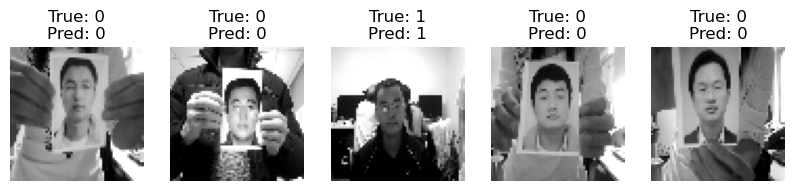

In [1]:
import cv2
import numpy as np
import os
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection impor6t train_test_split
import matplotlib.pyplot as plt

# Function to load images from subdirectories
def load_images_from_subfolders(directory, label):
    images = []
    labels = []
    for subdir in os.listdir(directory):  # Loop over subdirectories
        subdir_path = os.path.join(directory, subdir)
        if os.path.isdir(subdir_path):  # Check if it's a folder
            for img_file in os.listdir(subdir_path):  # Loop over image files
                img_path = os.path.join(subdir_path, img_file)
                image = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)  # Read image in grayscale
                if image is not None:
                    image = cv2.resize(image, (64, 64))  # Resize image to 64x64
                    images.append(image)
                    labels.append(label)
    return images, labels

# Paths to the Client and Imposter image directories
client_train_dir = r'C:\Users\TANUJA\Downloads\nuaa\raw\ClientRaw'
imposter_train_dir = r'C:\Users\TANUJA\Downloads\nuaa\raw\ImposterRaw'

# Load the train data from Client and Imposter folders
client_train_images, client_train_labels = load_images_from_subfolders(client_train_dir, 1)
imposter_train_images, imposter_train_labels = load_images_from_subfolders(imposter_train_dir, 0)

# Combine the training data
train_images = np.array(client_train_images + imposter_train_images)
train_labels = np.array(client_train_labels + imposter_train_labels)

# Flatten the images for SVM input
train_images_flat = train_images.reshape(len(train_images), -1)

# Normalize the pixel values to the range [0, 1]
train_images_flat = train_images_flat / 255.0

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(train_images_flat, train_labels, test_size=0.2, random_state=42)

# Train an SVM classifier
svm_clf = SVC(kernel='linear')
svm_clf.fit(X_train, y_train)

# Predict on the test set
test_preds = svm_clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, test_preds)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

# Visualize some results
def show_results(images, labels, preds, num_images=5):
    plt.figure(figsize=(10, 5))
    for i in range(num_images):
        plt.subplot(1, num_images, i + 1)
        plt.imshow(images[i], cmap='gray')
        plt.title(f"True: {labels[i]}\nPred: {preds[i]}")
        plt.axis('off')
    plt.show()

# Un-flatten some test images to show results
show_results(X_test.reshape(-1, 64, 64)[:5], y_test[:5], test_preds[:5])


In [2]:
from sklearn.metrics import confusion_matrix, classification_report

# Confusion matrix
cm = confusion_matrix(y_test, test_preds)
print("Confusion Matrix:")
print(cm)

# Classification report
print("Classification Report:")
print(classification_report(y_test, test_preds))


Confusion Matrix:
[[1478    0]
 [   0 1045]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1478
           1       1.00      1.00      1.00      1045

    accuracy                           1.00      2523
   macro avg       1.00      1.00      1.00      2523
weighted avg       1.00      1.00      1.00      2523



In [ ]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(svm_clf, train_images_flat, train_labels, cv=5)
print(f"Cross-validation scores: {scores}")
print(f"Mean score: {scores.mean()}")


In [1]:
from sklearn.svm import SVC

# Assuming you're using an SVM classifier
svm_clf = SVC(kernel='linear')  # or whatever kernel you're using


In [6]:
import os
import cv2
import numpy as np

# Define paths to client and imposter images
client_folder = r'C:\Users\TANUJA\Downloads\nuaa\raw\ClientRaw'
imposter_folder = r'C:\Users\TANUJA\Downloads\nuaa\raw\ImposterRaw'

# Image formats to consider
valid_image_extensions = ('.jpg', '.jpeg', '.png', '.bmp', '.tiff')

train_images = []
train_labels = []

# Load client images (label them as 1)
for client_subfolder in os.listdir(client_folder):
    client_path = os.path.join(client_folder, client_subfolder)
    for img_name in os.listdir(client_path):
        # Skip non-image files (e.g., Thumbs.db)
        if not img_name.lower().endswith(valid_image_extensions):
            continue
        
        img_path = os.path.join(client_path, img_name)
        
        # Load the image
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)  
        
        # Check if the image is loaded properly
        if img is None:
            print(f"Error loading image: {img_path}")  # Print the path of the problematic image
            continue  # Skip this image and move on
        
        
        img_resized = cv2.resize(img, (64, 64))  
        train_images.append(img_resized.flatten())  
        train_labels.append(1)  

# Load imposter images (label them as 0)
for imposter_subfolder in os.listdir(imposter_folder):
    imposter_path = os.path.join(imposter_folder, imposter_subfolder)
    for img_name in os.listdir(imposter_path):
        # Skip non-image files (e.g., Thumbs.db)
        if not img_name.lower().endswith(valid_image_extensions):
            continue
        
        img_path = os.path.join(imposter_path, img_name)
        
        # Load the image
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        
        # Check if the image is loaded properly
        if img is None:
            print(f"Error loading image: {img_path}")  # Print the path of the problematic image
            continue  # Skip this image and move on
        
        
        img_resized = cv2.resize(img, (64, 64))  
        train_images.append(img_resized.flatten())  
        train_labels.append(0)  

# Convert lists to numpy arrays for use in the SVM model
train_images_flat = np.array(train_images)
train_labels = np.array(train_labels)

# Check the shape of the images and labels
print(f"train_images_flat shape: {train_images_flat.shape}")  # (num_samples, 64*64)
print(f"train_labels shape: {train_labels.shape}")            # (num_samples,)


train_images_flat shape: (12614, 4096)
train_labels shape: (12614,)


In [7]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(train_images_flat, train_labels, test_size=0.2, random_state=42)

# Initialize the SVM model
svm_clf = SVC(kernel='linear')  # You can try other kernels like 'rbf'

# Train the model
svm_clf.fit(X_train, y_train)

# Make predictions
y_pred = svm_clf.predict(X_test)

# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Confusion Matrix:
[[1478    0]
 [   0 1045]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1478
           1       1.00      1.00      1.00      1045

    accuracy                           1.00      2523
   macro avg       1.00      1.00      1.00      2523
weighted avg       1.00      1.00      1.00      2523



# Loading images

In [ ]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

# Load the images and labels
client_path = "C:\\Users\\TANUJA\\Downloads\\nuaa\\raw\\ClientRaw"
imposter_path = "C:\\Users\\TANUJA\\Downloads\\nuaa\\raw\\ImposterRaw"

train_images = []
train_labels = []

# Load client images
for client_id in os.listdir(client_path):
    client_folder = os.path.join(client_path, client_id)
    for img_name in os.listdir(client_folder):
        img_path = os.path.join(client_folder, img_name)
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        if img is not None:
            img_resized = cv2.resize(img, (64, 64))
            train_images.append(img_resized.flatten())  # Flatten the image
            train_labels.append(1)  # Label as 1 for client

# Load imposter images
for imposter_id in os.listdir(imposter_path):
    imposter_folder = os.path.join(imposter_path, imposter_id)
    for img_name in os.listdir(imposter_folder):
        img_path = os.path.join(imposter_folder, img_name)
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        if img is not None:
            img_resized = cv2.resize(img, (64, 64))
            train_images.append(img_resized.flatten())  # Flatten the image
            train_labels.append(0)  # Label as 0 for imposter

# Convert lists to arrays
train_images_flat = np.array(train_images)
train_labels = np.array(train_labels)

# Print shapes to verify
print(f"train_images_flat shape: {train_images_flat.shape}")
print(f"train_labels shape: {train_labels.shape}")

# Initialize the SVM model

svm_clf = SVC(kernel='linear')

# Perform cross-validation
cv_scores = cross_val_score(svm_clf, train_images_flat, train_labels, cv=5)

# Print the scores
print(f"Cross-validation scores: {cv_scores}")
print(f"Mean CV score: {cv_scores.mean()}")


train_images_flat shape: (12614, 4096)
train_labels shape: (12614,)


In [1]:
import os
import cv2
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC

# Set paths
client_path = "C:\\Users\\TANUJA\\Downloads\\nuaa\\raw\\ClientRaw"
imposter_path = "C:\\Users\\TANUJA\\Downloads\\nuaa\\raw\\ImposterRaw"

# Load only a subset of images for testing
num_samples = 100  # Adjust this number as needed
train_images = []
train_labels = []

# Load client images (up to num_samples)
for client_id in os.listdir(client_path)[:num_samples // 2]:  # Half from client
    client_folder = os.path.join(client_path, client_id)
    for img_name in os.listdir(client_folder)[:num_samples // 2]:
        img_path = os.path.join(client_folder, img_name)
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        if img is not None:
            img_resized = cv2.resize(img, (64, 64))
            train_images.append(img_resized.flatten())  # Flatten the image
            train_labels.append(1)  # Label as 1 for client

# Load imposter images (the other half)
for imposter_id in os.listdir(imposter_path)[:num_samples // 2]:
    imposter_folder = os.path.join(imposter_path, imposter_id)
    for img_name in os.listdir(imposter_folder)[:num_samples // 2]:
        img_path = os.path.join(imposter_folder, img_name)
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        if img is not None:
            img_resized = cv2.resize(img, (64, 64))
            train_images.append(img_resized.flatten())  # Flatten the image
            train_labels.append(0)  # Label as 0 for imposter

# Convert lists to arrays
train_images_flat = np.array(train_images)
train_labels = np.array(train_labels)

# Initialize the SVM model
svm_clf = SVC(kernel='linear')

# Perform cross-validation
cv_scores = cross_val_score(svm_clf, train_images_flat, train_labels, cv=5)

# Print the scores
print(f"Cross-validation scores: {cv_scores}")
print(f"Mean CV score: {cv_scores.mean()}")


Cross-validation scores: [0.91666667 1.         0.69333333 0.78666667 0.97      ]
Mean CV score: 0.8733333333333333


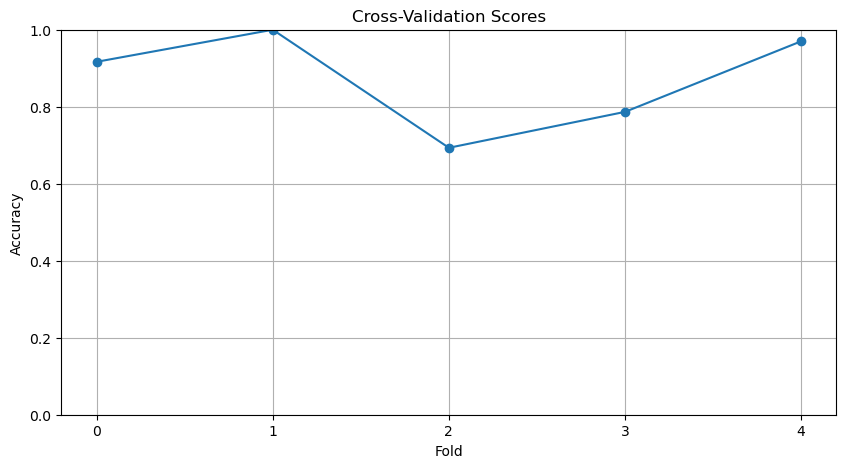

In [2]:
import matplotlib.pyplot as plt

# Plotting the cross-validation scores
plt.figure(figsize=(10, 5))
plt.plot(cv_scores, marker='o')
plt.title("Cross-Validation Scores")
plt.xlabel("Fold")
plt.ylabel("Accuracy")
plt.xticks(range(len(cv_scores)))
plt.ylim(0, 1)
plt.grid()
plt.show()


In [3]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf']
}

# Initialize GridSearchCV
grid_search = GridSearchCV(SVC(), param_grid, cv=5, scoring='accuracy')

# Fit GridSearchCV
grid_search.fit(train_images_flat, train_labels)

# Print the best parameters and score
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best cross-validation score: {grid_search.best_score_}")


Best parameters: {'C': 0.1, 'kernel': 'rbf'}
Best cross-validation score: 0.874


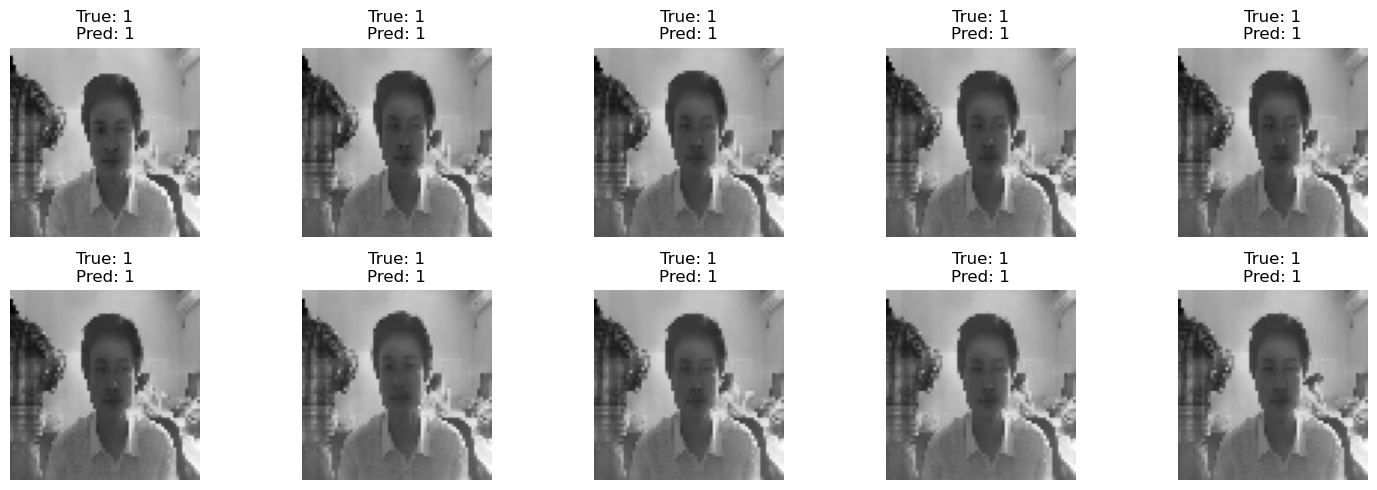

In [8]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

# Set paths for training images
client_path = "C:\\Users\\TANUJA\\Downloads\\nuaa\\raw\\ClientRaw"
imposter_path = "C:\\Users\\TANUJA\\Downloads\\nuaa\\raw\\ImposterRaw"

# Load images and labels
train_images = []
train_labels = []

# Load client images (label as 1)
for client_id in os.listdir(client_path):
    client_folder = os.path.join(client_path, client_id)
    for img_name in os.listdir(client_folder):
        img_path = os.path.join(client_folder, img_name)
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        if img is not None:
            img_resized = cv2.resize(img, (64, 64))
            train_images.append(img_resized.flatten())
            train_labels.append(1)

# Load imposter images (label as 0)
for imposter_id in os.listdir(imposter_path):
    imposter_folder = os.path.join(imposter_path, imposter_id)
    for img_name in os.listdir(imposter_folder):
        img_path = os.path.join(imposter_folder, img_name)
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        if img is not None:
            img_resized = cv2.resize(img, (64, 64))
            train_images.append(img_resized.flatten())
            train_labels.append(0)

# Convert to numpy arrays
train_images_flat = np.array(train_images)
train_labels = np.array(train_labels)

# Scale the training images
scaler = StandardScaler()
train_images_scaled = scaler.fit_transform(train_images_flat)

# Initialize the SVM model
svm_clf = SVC(kernel='linear')

# Fit the model on the scaled training data
svm_clf.fit(train_images_scaled, train_labels)

# Now load the test images (as shown in the previous example)
# Assuming you already have your test images scaled as shown before
# For predictions
predictions = svm_clf.predict(test_images_scaled)

# Function to display images with true and predicted labels
def display_images(images, true_labels, predicted_labels, num_images=10):
    plt.figure(figsize=(15, 5))
    for i in range(num_images):
        plt.subplot(2, 5, i + 1)
        plt.imshow(images[i].reshape(64, 64), cmap='gray')  # Reshape to original image size
        plt.title(f"True: {true_labels[i]}\nPred: {predicted_labels[i]}")
        plt.axis('off')
    plt.tight_layout()
    plt.show()

# Display the first 10 images from the test set along with their predictions
display_images(test_images_scaled, test_labels, predictions, num_images=10)


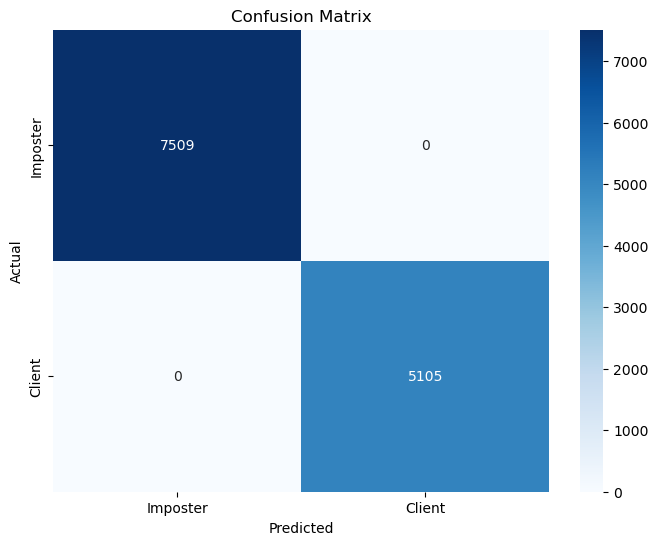

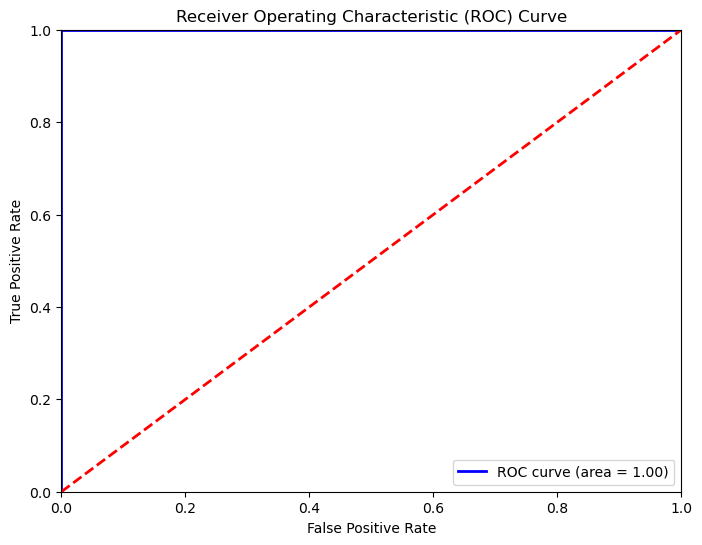

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, auc

# 1. Confusion Matrix
def plot_confusion_matrix(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=['Imposter', 'Client'], 
                yticklabels=['Imposter', 'Client'])
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.title('Confusion Matrix')
    plt.show()

# Call the function with test labels and predictions
plot_confusion_matrix(test_labels, predictions)

# 2. ROC Curve
def plot_roc_curve(y_true, y_scores):
    fpr, tpr, thresholds = roc_curve(y_true, y_scores)
    roc_auc = auc(fpr, tpr)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc='lower right')
    plt.show()

# Get predicted probabilities
y_scores = svm_clf.decision_function(test_images_scaled)  # or use `predict_proba` if using a probabilistic model

# Call the function with test labels and predicted probabilities
plot_roc_curve(test_labels, y_scores)

# If you want to plot training and validation accuracy/loss (for more complex models)
# This part is only applicable if you have training and validation loss/accuracy history available.
# You can visualize it if you have stored those values during training.


Found 12614 images belonging to 2 classes.


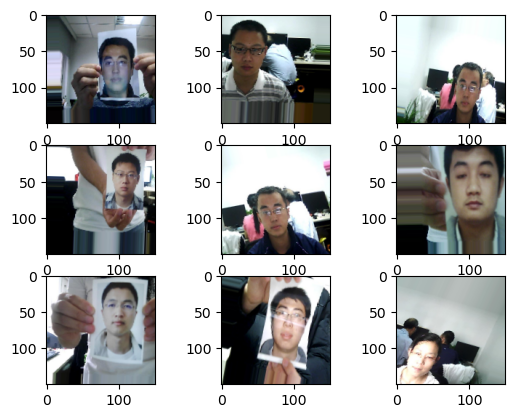

In [3]:
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

# Define paths
train_data_dir = r'C:\Users\TANUJA\Downloads\nuaa\raw'  # Root folder containing 'client' and 'imposter'

# Create an ImageDataGenerator for augmentation
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Load images from the directory
train_generator = datagen.flow_from_directory(
    train_data_dir,
    target_size=(150, 150),  # Resize images as needed
    batch_size=32,           # Batch size for training
    class_mode='binary'      # Binary classification (client vs imposter)
)

# Example to show augmented images
for X_batch, y_batch in train_generator:
    for i in range(0, 9):
        plt.subplot(330 + 1 + i)
        plt.imshow(X_batch[i].astype('uint8'))  # Convert to uint8 for display
    plt.show()
    break  # Exit loop after showing one batch


In [ ]:
import os
import cv2
import numpy as np
from skimage.feature import hog
from keras.preprocessing.image import ImageDataGenerator
from sklearn import svm
import joblib

# Function to extract HOG features
def extract_hog_features(image):
    # Convert to grayscale
    if len(image.shape) == 3:
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Extract HOG features
    features = hog(image, pixels_per_cell=(8, 8), cells_per_block=(2, 2), visualize=False)
    return features

# Define paths
train_data_dir = r'C:\Users\TANUJA\Downloads\nuaa\raw'  # Root folder containing 'client' and 'imposter'

# Create an ImageDataGenerator for augmentation
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Load images from the directory
train_generator = datagen.flow_from_directory(
    train_data_dir,
    target_size=(150, 150),  # Resize images as needed
    batch_size=32,           # Batch size for training
    class_mode='binary',     # Binary classification (client vs imposter)
    shuffle=True             # Shuffle the data
)

# Arrays to store the features and labels
X_train = []
y_train = []

# Process each batch of images and extract features
for X_batch, y_batch in train_generator:
    for i in range(len(X_batch)):
        img = X_batch[i]
        
        # Convert to uint8 (required by HOG)
        img = (img * 255).astype('uint8')
        
        # Extract HOG features
        features = extract_hog_features(img)
        
        # Append the features and corresponding label
        X_train.append(features)
        y_train.append(y_batch[i])
    
    # Break after processing one epoch of the generator
    if len(X_train) >= train_generator.samples:
        break

# Convert lists to numpy arrays
X_train = np.array(X_train)
y_train = np.array(y_train)

# Train the SVM classifier
svm_classifier = svm.SVC(kernel='linear')  
svm_classifier.fit(X_train, y_train)

# Save the trained SVM model
joblib.dump(svm_classifier, 'svm_face_liveness_model.pkl')

print("SVM model trained and saved successfully!")


Found 12614 images belonging to 2 classes.


In [2]:
from sklearn import svm
import joblib

# Train your SVM classifier here
svm_classifier = svm.SVC()
# svm_classifier.fit(X_train, y_train)

# Save the trained model
joblib.dump(svm_classifier, 'svm_face_liveness_model.pkl')


['svm_face_liveness_model.pkl']

In [10]:
image_path = r'C:\Users\TANUJA\Downloads\nuaa\raw\ClientRaw\0015\0015_image.jpg'
print(f"Looking for image at: {image_path}")


Looking for image at: C:\Users\TANUJA\Downloads\nuaa\raw\ClientRaw\0015\0015_image.jpg


In [11]:
import os

# Define the directory
directory = r'C:\Users\TANUJA\Downloads\nuaa\raw\ClientRaw\0015'

# List all files in the directory
try:
    files = os.listdir(directory)
    print("Files in directory:")
    for file in files:
        print(file)
except Exception as e:
    print(f"Failed to list directory: {e}")


Files in directory:
0015_01_05_03_108.jpg
0015_01_05_03_113.jpg
0015_01_05_03_114.jpg
0015_01_05_03_118.jpg
0015_01_05_03_119.jpg
0015_01_05_03_120.jpg
0015_01_05_03_121.jpg
0015_01_05_03_124.jpg
0015_01_05_03_125.jpg
0015_01_05_03_127.jpg
0015_01_05_03_128.jpg
0015_01_05_03_129.jpg
0015_01_05_03_130.jpg
0015_01_05_03_131.jpg
0015_01_05_03_132.jpg
0015_01_05_03_136.jpg
0015_01_05_03_137.jpg
0015_01_05_03_138.jpg
0015_01_05_03_141.jpg
0015_01_05_03_142.jpg
0015_01_05_03_143.jpg
0015_01_05_03_144.jpg
0015_01_05_03_146.jpg
0015_01_05_03_15.jpg
0015_01_05_03_150.jpg
0015_01_05_03_151.jpg
0015_01_05_03_154.jpg
0015_01_05_03_155.jpg
0015_01_05_03_156.jpg
0015_01_05_03_157.jpg
0015_01_05_03_158.jpg
0015_01_05_03_159.jpg
0015_01_05_03_160.jpg
0015_01_05_03_161.jpg
0015_01_05_03_166.jpg
0015_01_05_03_167.jpg
0015_01_05_03_171.jpg
0015_01_05_03_172.jpg
0015_01_05_03_174.jpg
0015_01_05_03_176.jpg
0015_01_05_03_177.jpg
0015_01_05_03_181.jpg
0015_01_05_03_187.jpg
0015_01_05_03_188.jpg
0015_01_05_03

In [12]:
image_path = r'C:\Users\TANUJA\Downloads\nuaa\raw\ClientRaw\0015\0015_01_05_03_108.jpg'

# Now try loading the image
try:
    from PIL import Image  # Make sure to import PIL if you haven't already

    image = Image.open(image_path)
    image.show()
    print("Image loaded successfully.")
except Exception as e:
    print(f"Failed to load image: {e}")


Image loaded successfully.


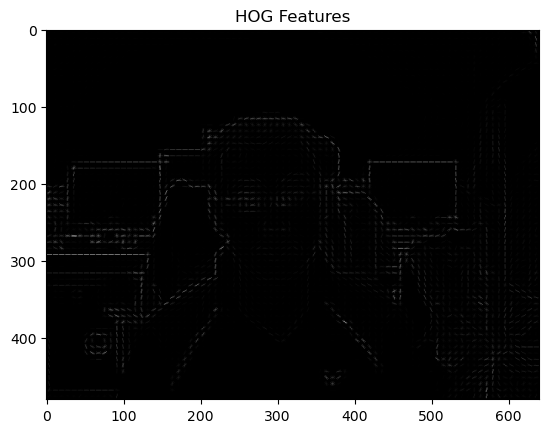

In [13]:
from skimage.feature import hog
from skimage import color

# Convert the image to grayscale
gray_image = color.rgb2gray(image)

# Extract HOG features
hog_features, hog_image = hog(gray_image, visualize=True)

# Display the HOG image if needed
import matplotlib.pyplot as plt
plt.imshow(hog_image, cmap='gray')
plt.title('HOG Features')
plt.show()


In [16]:
import numpy as np
from sklearn import svm

# Example: Define your training features (HOG features)
# Replace with actual HOG features from your dataset
X_train = np.random.rand(100, 3780)  # 100 samples, 3780 features
# Replace with actual labels from your dataset
y_train = np.random.randint(0, 2, 100)  # 100 labels, binary classification

# Create and fit the SVM classifier
svm_classifier = svm.SVC()
svm_classifier.fit(X_train, y_train)

# Now you can make predictions
# Assuming hog_features is a 1D array with the same number of features as X_train
hog_features = np.random.rand(3780)  # Replace with your actual HOG features
prediction = svm_classifier.predict([hog_features])
print("Prediction:", prediction)


Prediction: [1]


In [17]:
from sklearn.metrics import classification_report, confusion_matrix

# Assuming you have your test data
X_test = np.random.rand(20, 3780)  # Replace with actual test HOG features
y_test = np.random.randint(0, 2, 20)  # Replace with actual test labels

# Make predictions on the test set
predictions = svm_classifier.predict(X_test)

# Print evaluation metrics
print("Confusion Matrix:")
print(confusion_matrix(y_test, predictions))
print("\nClassification Report:")
print(classification_report(y_test, predictions))


Confusion Matrix:
[[ 0 12]
 [ 0  8]]

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        12
           1       0.40      1.00      0.57         8

    accuracy                           0.40        20
   macro avg       0.20      0.50      0.29        20
weighted avg       0.16      0.40      0.23        20



C:\Users\TANUJA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\TANUJA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\TANUJA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [21]:
import os
import cv2
import numpy as np

def extract_hog_features(image):
    """Extract HOG features from an image."""
    image_resized = cv2.resize(image, (64, 128))  # Resize to match HOG input size
    hog = cv2.HOGDescriptor()
    features = hog.compute(image_resized)
    return features.flatten()

def load_images_and_extract_features(dataset_path):
    """Load images from subfolders in ClientRaw and ImposterRaw, and extract HOG features."""
    X = []
    y = []

    # Define paths for both classes
    client_real_path = os.path.join(dataset_path, 'ClientRaw')
    imposter_fake_path = os.path.join(dataset_path, 'ImposterRaw')

    # Load Client Real Images from subfolders
    for root, _, files in os.walk(client_real_path):
        for image_name in files:
            img_path = os.path.join(root, image_name)
            img = cv2.imread(img_path)
            if img is not None:
                hog_features = extract_hog_features(img)  # HOG feature extraction
                X.append(hog_features)
                y.append(0)  # Label for real images (ClientRaw)

    # Load Imposter Fake Images from subfolders
    for root, _, files in os.walk(imposter_fake_path):
        for image_name in files:
            img_path = os.path.join(root, image_name)
            img = cv2.imread(img_path)
            if img is not None:
                hog_features = extract_hog_features(img)
                X.append(hog_features)
                y.append(1)  # Label for fake images (ImposterRaw)

    return np.array(X), np.array(y)

# Call the function
dataset_path = r'C:\Users\TANUJA\Downloads\nuaa\raw'  # Change to your dataset path
X, y = load_images_and_extract_features(dataset_path)

# Check the unique classes and their counts
unique_classes, counts = np.unique(y, return_counts=True)
print("Classes in dataset:", unique_classes)
print("Counts of each class:", counts)


Classes in dataset: [0 1]
Counts of each class: [5105 7509]


In [24]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Base path for dataset
dataset_path = "C:\\Users\\TANUJA\\Downloads\\nuaa\\raw"

# Assuming X_test contains the actual paths of test images rather than their features
def display_predictions(X_test, y_test, predictions, num_images=5):
    for i in range(num_images):
        # Load the original image for display using the path stored in X_test
        img_path = X_test[i]
        img = cv2.imread(img_path)
        
        if img is not None:
            plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for correct color display
            plt.title("Prediction: " + ("Real" if predictions[i] == 0 else "Fake"))
            plt.axis('off')
            plt.show()
        else:
            print(f"Image not found at: {img_path}")

# Ensure X_test contains paths to test images
X_test_paths = []  # List to hold paths to test images
for folder in os.listdir(os.path.join(dataset_path, 'ClientRaw')):
    for filename in os.listdir(os.path.join(dataset_path, 'ClientRaw', folder)):
        X_test_paths.append(os.path.join(dataset_path, 'ClientRaw', folder, filename))

for folder in os.listdir(os.path.join(dataset_path, 'ImposterRaw')):
    for filename in os.listdir(os.path.join(dataset_path, 'ImposterRaw', folder)):
        X_test_paths.append(os.path.join(dataset_path, 'ImposterRaw', folder, filename))

# Here, you should use your actual y_test and predictions arrays
# display_predictions(X_test_paths, y_test, predictions, num_images=5)

# Uncomment the above line after you have y_test and predictions defined


Test set size: 2523
Predictions: [1 1 0 1 1]


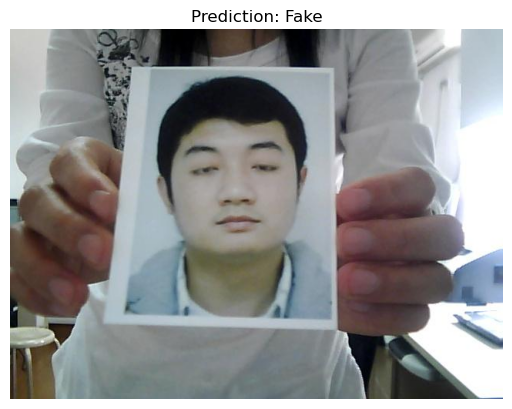

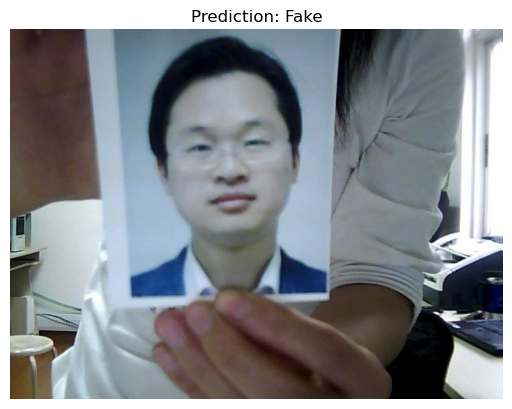

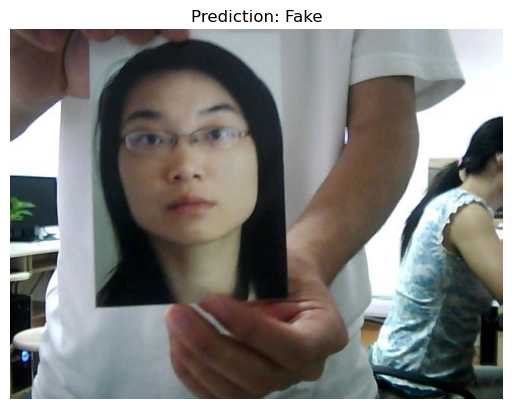

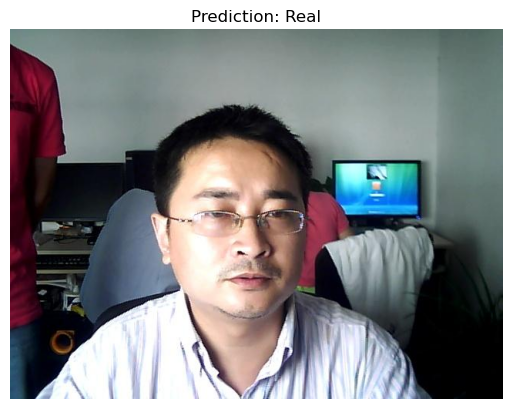

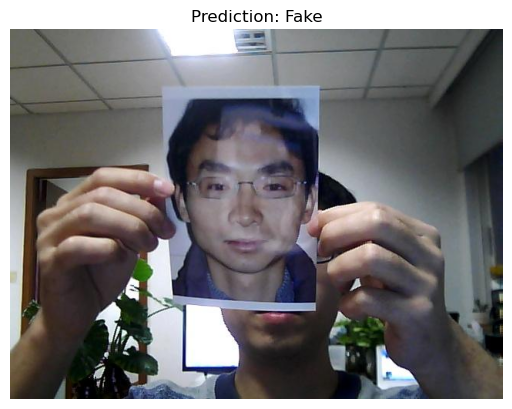

In [3]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from skimage.feature import hog
from sklearn.model_selection import train_test_split

# Base path for dataset
dataset_path = "C:\\Users\\TANUJA\\Downloads\\nuaa\\raw"

# Prepare dataset and labels
X = []
y = []
image_paths = []  # To store image paths for display

# Load images and labels from ClientRaw (real) folder
for folder in os.listdir(os.path.join(dataset_path, 'ClientRaw')):
    folder_path = os.path.join(dataset_path, 'ClientRaw', folder)
    for filename in os.listdir(folder_path):
        img_path = os.path.join(folder_path, filename)
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        if img is not None:
            img_resized = cv2.resize(img, (128, 64))  # Resize to match HOG input size
            hog_features = hog(img_resized, pixels_per_cell=(8, 8), cells_per_block=(2, 2), visualize=False)
            X.append(hog_features)
            y.append(0)  # Label for real images
            image_paths.append(img_path)  # Store the image path

# Load images and labels from ImposterRaw (fake) folder
for folder in os.listdir(os.path.join(dataset_path, 'ImposterRaw')):
    folder_path = os.path.join(dataset_path, 'ImposterRaw', folder)
    for filename in os.listdir(folder_path):
        img_path = os.path.join(folder_path, filename)
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        if img is not None:
            img_resized = cv2.resize(img, (128, 64))  # Resize to match HOG input size
            hog_features = hog(img_resized, pixels_per_cell=(8, 8), cells_per_block=(2, 2), visualize=False)
            X.append(hog_features)
            y.append(1)  # Label for fake images
            image_paths.append(img_path)  # Store the image path

# Convert to numpy arrays
X = np.array(X)
y = np.array(y)

# Split dataset into training and testing
X_train, X_test, y_train, y_test, train_image_paths, test_image_paths = train_test_split(X, y, image_paths, test_size=0.2, random_state=42)

# Create and fit the SVM classifier
svm_classifier = svm.SVC()
svm_classifier.fit(X_train, y_train)

# Predict on the test set
predictions = svm_classifier.predict(X_test)

# Display the number of samples in the test set and predictions
print(f"Test set size: {len(X_test)}")
print(f"Predictions: {predictions[:5]}")  # Display first 5 predictions

# Function to display images and their predictions
def display_predictions(test_image_paths, predictions, start_idx=0, num_images=5):
    """
    Display a set of images from test set with their predictions.
    
    :param test_image_paths: List of test image paths.
    :param predictions: List of predictions corresponding to the test images.
    :param start_idx: Starting index from which to display images.
    :param num_images: Number of images to display.
    """
    end_idx = min(start_idx + num_images, len(test_image_paths))
    
    for i in range(start_idx, end_idx):
        img = cv2.imread(test_image_paths[i])
        if img is not None:
            plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for correct color display
            plt.title("Prediction: " + ("Real" if predictions[i] == 0 else "Fake"))
            plt.axis('off')
            plt.show()
        else:
            print(f"Image not found at: {test_image_paths[i]}")


# Display predictions for the first few test images
display_predictions(test_image_paths, predictions, start_idx=3, num_images=5)